# Gaussian Mixture models

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

from sklearn.preprocessing import StandardScaler

### Load the Iris dataset

The Iris Dataset. This data sets consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. The below plot uses the first two features.

In [19]:
iris = datasets.load_iris()
#next we import it into a pandas frame for convenience (not necessry)
pdiris = pd.DataFrame(iris.data, columns=iris.feature_names)
print(pdiris.shape)
pdiris.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Plots 

Below we will see some 2d plots just to get a feel of the data. There appears to be some clustering but it is hard to infer the number of clusters of the 4d datasets from 2d plots. 

Text(0, 0.5, 'petal length (cm)')

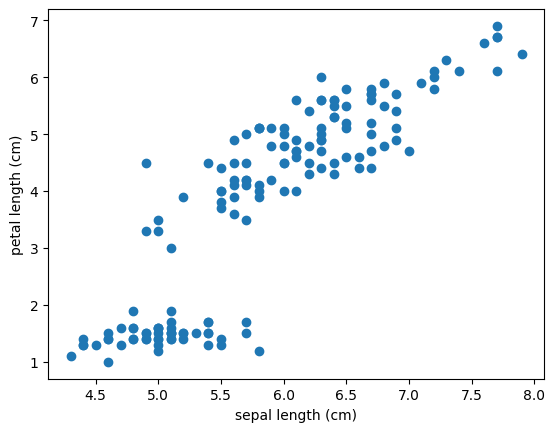

In [20]:
plt.plot(pdiris['sepal length (cm)'], pdiris['petal length (cm)'], 'o')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

Text(0, 0.5, 'petal width (cm)')

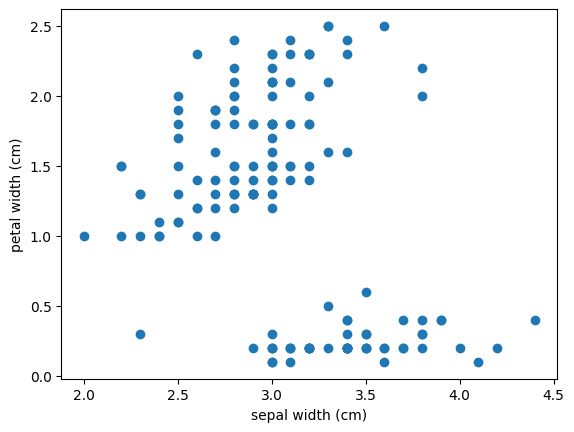

In [21]:
plt.plot(pdiris['sepal width (cm)'], pdiris['petal width (cm)'], 'o')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

### Fitting GMMs using the EM algorithm

The code for doing so is given below. The '.fit' bit obtains the maximum likelihood estimations of means and covariances that can be viewed using '.means_' and '.covariances_'

We start by inspecting and visualisibg a 2-d dataset with only the 'sepal width (cm)' and 'petal width (cm)' variables. The full dataset is analysed afterwards

In [22]:
vars = ['sepal width (cm)','petal width (cm)']
gmm = GaussianMixture(n_components=2)
gmm.fit(pdiris[vars])
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[2.8682708  1.66689483]
 [3.44312706 0.24524535]]


[[[0.11104185 0.08380788]
  [0.08380788 0.18987438]]

 [[0.12543252 0.01006202]
  [0.01006202 0.01098207]]]


### Soft allocation of individuals to clusters

GMM method does not necesarily allocates individuals with certainty but with probabilities.

Adding the probabilities can give as an ideas of how many objects each cluster has.

In [23]:
probs = gmm.predict_proba(pdiris[vars])
print(np.sum(probs,axis=0))
print(probs[21:50].round(3))

[100.70617494  49.29382506]
[[0.    1.   ]
 [0.    1.   ]
 [0.001 0.999]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.7   0.3  ]
 [0.    1.   ]
 [0.003 0.997]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


### Model Search

We need to fit models with different numbers of cluster and different type of covariance matrices to identify the best one. This is done via the information-theoretic criteria (BIC) (the smaller the better in this case)

Types of covariance matrices:
 - spherical: each cluster k has covariance $\sigma^2_k I$
 - tied: full covariance matrix but the same across clusters
 - diag: diagonal covariance matrix, different for each cluster
 - full: full covariance matrix, different for each cluster
 
 Write your code in the following cell. It is recommended to save your output in a Panda dataframe and print mean and covaiance of the best GMM.

In [41]:
def fit_gmm(X, n_components, cov_type):
    gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=0)
    gmm.fit(X)
    bic = gmm.bic(X)
    return gmm, bic

def gmm(X):
    results = []
    for n in n_components_list:
        for c in cov_types:
            gmm, bic = fit_gmm(X, n, c)
            results.append({'n_components': n, 'cov_type': c, 'bic': bic})
    df = pd.DataFrame(results)
    return df 

def gmm_best(X):
    data = gmm(X)
    best_gmm = data.loc[data['bic'].idxmin()]
    best_clusters = best_gmm['n_components']
    best_cov_type = best_gmm['cov_type']
    return best_clusters, best_cov_type

n_components_list = np.arange(1,15)
cov_types = ['spherical', 'tied', 'diag', 'full']

vars1 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = pdiris[vars1]
best_clusters, best_cov_type = gmm_best(X)
best_clusters, best_cov_type



(2, 'full')

In [25]:
best_gmm, best_bic = fit_gmm(X, best_clusters, best_cov_type)
means = best_gmm.means_
covs = best_gmm.covariances_
means, covs

(array([[5.00600639, 3.4280142 , 1.46200203, 0.24599932],
        [6.26198886, 2.87199642, 4.90597719, 1.67599129]]),
 array([[[0.12176331, 0.09722605, 0.01602717, 0.01012447],
         [0.09722605, 0.14080279, 0.01146185, 0.00911288],
         [0.01602717, 0.01146185, 0.02955704, 0.00594818],
         [0.01012447, 0.00911288, 0.00594818, 0.0108851 ]],
 
        [[0.43497387, 0.12094155, 0.44886533, 0.16550229],
         [0.12094155, 0.10961836, 0.14138002, 0.07923243],
         [0.44886533, 0.14138002, 0.67484296, 0.2858736 ],
         [0.16550229, 0.07923243, 0.2858736 , 0.17863587]]]))

Repeat the analysis using only two of the four variables. Do we get a different conclusion on the number of clusters? 

Put your code below

In [47]:
vars2 = ['sepal length (cm)', 'sepal width (cm)']
X2 = pdiris[vars2]
best_clusters2, best_cov_type2 = gmm_best(X2)
print(best_clusters2, best_cov_type2)


vars3 = ['sepal width (cm)', 'petal width (cm)']
X3 = pdiris[vars3]
best_clusters3, best_cov_type3= gmm_best(X3)
print(best_clusters3, best_cov_type3)

2 full
9 full


### Simulate data to test the method

So far we have been looking at a dataset where we are not sure about the 'true' number of clusters and type of covariance matrix.

In following cell, simulate data from a Gaussian mixture with three components with the mean and covariance matrix as following.

1\. $mean = (0,0),\quad cov=1I$,

2\. $mean = (-6,3),\quad cov = 16I,$

3\. $mean = (3,-4),\quad cov=9I$.

In [48]:
np.random.seed(42)
Gaussian1 = np.random.multivariate_normal(mean=[0,0], cov=np.eye(2), size=200)
Gaussian2 = np.random.multivariate_normal(mean=[-6,3], cov=16*np.eye(2), size=200)
Gaussian3 = np.random.multivariate_normal(mean=[3,-4], cov=9*np.eye(2), size=200)
data = np.vstack((Gaussian1, Gaussian2, Gaussian3))

### Test the method

Below you will repeat the previous model search procedure to the synthetic data that you generated in the previous cell. We would like to test whether the optimal models will indeed be the one with three components and spherical covariance

In [49]:
best_clusters, best_cov_type = gmm_best(data)
best_clusters, best_cov_type


(3, 'spherical')

Conduct another simulation experiment generating data from a Gaussian mixture. Choose your own number of components, means and covariances.

In [50]:
G4 = np.random.multivariate_normal(mean=[0.5, 0.5], cov=np.diag([1,3]), size=200)
G5 = np.random.multivariate_normal(mean=[1,7], cov=np.diag([6,2]), size=200)
data2 = np.vstack((G4, G5))
best_clusters, best_cov_type = gmm_best(data2)
best_clusters, best_cov_type

(2, 'diag')

## Overfitted (Bayesian) Gaussian Mixtures

Now we will explore what happens when we fit a model with more components than the ones in the data. 

In [51]:
# Number of samples per component
n_samples = 200
X = np.r_[np.random.randn(n_samples, 2), 
          .4 * np.random.randn(n_samples, 2) + np.array([-6, 3]), 
         3* np.random.randn(n_samples, 2) + np.array([3, -4])] 

gmm = GaussianMixture(n_components=6,covariance_type='spherical')

gmm.fit(X)
probs = gmm.predict_proba(X)
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'], index=range(1,7))
results

,# of individuals
1,200.0
2,224.0
3,19.0
4,17.0
5,92.0
6,48.0


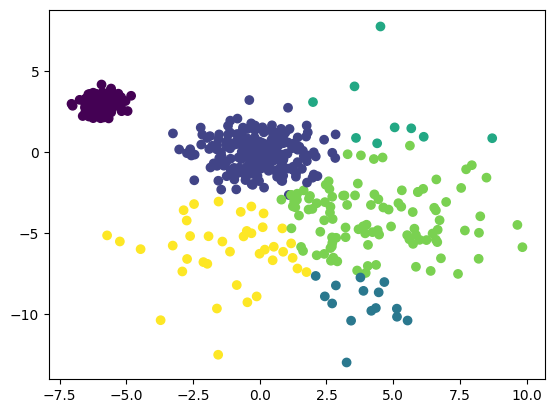

In [52]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels) 

We will also apply the fully Bayesian model to the same data with a Dirichlet prior on the cluster probabilities with a low hyperparameter (weight_concentration_prior) of 0.01. This choice is going to penalise redundant clusters by not allocating individuals to them unless it is necessaray 

In [53]:
Bgmm = BayesianGaussianMixture(n_components=6,covariance_type='full',
                               weight_concentration_prior=0.01, max_iter = 200)
Bgmm.fit(X)
probs = Bgmm.predict_proba(X)
results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'], index=range(1,7))
results


,# of individuals
1,187.0
2,200.0
3,0.0
4,0.0
5,213.0
6,0.0


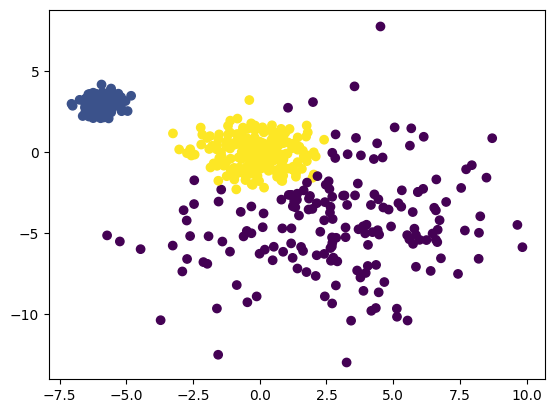

In [54]:
labels = Bgmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)

Fit the fully Bayesian approach to the Iris dataset and check the resulting number of clusters. Put your code below.

In [56]:
n_components_list = np.arange(1,10)
cov_types = ['spherical', 'tied', 'diag', 'full']
vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = pdiris[vars]

results = []
for n in n_components_list:
    for c in cov_types:
        bgmm = BayesianGaussianMixture(
            n_components=n, covariance_type=c,  max_iter = 200, 
            weight_concentration_prior=0.01, random_state=0)
        bgmm.fit(X)
        probs = bgmm.predict_proba(X)
        results = np.sum(probs,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'])

results



,# of individuals
0,50.0
1,70.0
2,13.0
3,17.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0


## K-Means Clustering and PCA of Human Activity Recognition

### Dataset info

Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (*WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING*) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. 

In [18]:
Data = pd.read_csv('train.csv') 

In [19]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
191,583,LAYING,0.263,-0.02190,-0.08710,-0.995,-0.9900,-0.994,-0.995,-0.9890,...,0.479,-0.6210,-0.879,-0.00935,0.422,0.116,0.126,0.388,-0.6580,-0.3060
183,559,SITTING,0.276,-0.01670,-0.10400,-0.997,-0.9950,-0.989,-0.997,-0.9960,...,0.100,0.0219,-0.310,-0.01480,-0.149,0.148,-0.694,-0.586,-0.1200,-0.1730
3400,9702,WALKING_DOWNSTAIRS,0.142,0.03190,0.00108,0.219,0.5770,-0.057,0.149,0.4070,...,-0.228,-0.3750,-0.785,0.49000,-0.350,-0.925,-0.775,-0.755,0.2580,0.0753
2981,8541,WALKING_UPSTAIRS,0.228,-0.00891,-0.12300,-0.312,-0.0515,0.146,-0.378,-0.0641,...,-0.141,-0.3860,-0.795,0.58100,-0.581,-0.929,0.407,-0.837,-0.0181,0.0143
3267,9340,WALKING_DOWNSTAIRS,0.302,0.01720,-0.08160,-0.189,-0.3610,-0.491,-0.243,-0.3770,...,0.132,-0.3820,-0.723,-0.07280,0.142,-0.980,0.872,-0.794,0.2220,-0.0555


In [20]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (3609, 563)


In [21]:
#save labels as string
Labels = Data['activity']
Data = Data.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [22]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [23]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data)

Apply k-means clustering with different number of clusters and find the optimal number of clusters. Plot sum of squared distances of samples to their closest cluster center versus number of cluster. 

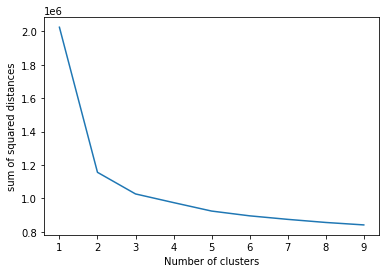

In [24]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=None)
    kmodel = model.fit(Data)
    wcss.append(kmodel.inertia_)
        
plt.figure()
plt.plot(np.arange(1, 10).astype(dtype=str), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('sum of squared distances')
plt.show()

Apply PCA and analyze principal components for dimensionality reduction.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(Data)
X_pca = pca.transform(Data)

explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.50817157, 0.06484235, 0.0276034 ])

Perform K-means clustering on the dimensionality-reduced data.

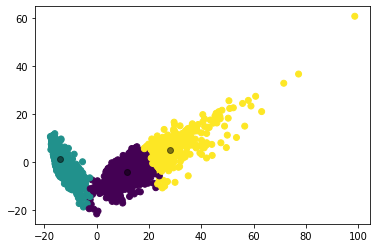

In [26]:
kmeans = KMeans(n_clusters=3, random_state=None) 
kmeans.fit(X_pca)

y_kmeans = kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5);